In [57]:
import data_helpers
import os
import pandas as pd

dataframes = {}
ls = os.listdir(os.getcwd() + "/Dataframes/All/")
for file in ls:
    if '.csv' in file and 'old' not in file:
        df = pd.read_csv(os.getcwd() + "/Dataframes/All/" + file, encoding='utf-8', engine='python')
        print(">>> {}:".format(file))
        print(df.columns.tolist(), '\n')
        dataframes[file.replace(".csv", "").replace('-P', '')] = df

>>> All-Test.csv:
['Unnamed: 0', 'text-rel', 'token', 'ActionName', 'Capability'] 

>>> All-Dev.csv:
['Unnamed: 0', 'text-rel', 'token', 'ActionName', 'Capability'] 

>>> All-Train.csv:
['Unnamed: 0', 'text-rel', 'token', 'ActionName', 'Capability'] 



In [58]:
dataframes[column]

,Unnamed: 0,text-rel,token,ActionName,Capability
0,0,ScanBox performs keylogging of users when they...,performs,-,other
1,1,an attacker perform reconnaissance and key log...,perform,-,other
2,2,tracking files and drives present on the victi...,tracking,-,other
3,3,it being a command and control destination for...,being,-,command_and_control
4,4,the e-mails contain links to websites hosting ...,contain,-,infection_propagation
5,5,Both backdoors were dropped from malicious doc...,were dropped,Network,other
6,6,backdoor HTTP communicates via to a hard-coded...,communicates,-,other
7,7,this change decrease detection,decrease,-,other
8,8,sent a spear phish email to a Taiwanese govern...,sent,Network,infection_propagation
9,9,The exploit document dropped the HIGHTIDE back...,dropped,-,-


In [93]:
'''
Fix '-' - separated words.
'''

for column in ['All-Train', 'All-Test']:
    for i in range(len(dataframes[column])):
        words = dataframes[column].at[i, 'token'].split()
        if any(re.match('.+?-$', x) is not None for x in words):
            splitted = [re.match('.+?-$', x) for x in words]
            new_words = []; idx = 0
            while idx < len(splitted):
                if splitted[idx] is None:
                    new_words.append(words[idx])
                    idx += 1
                else:
                    new_words.append(words[idx][:-1] + words[idx+1])
                    idx += 2
            dataframes[column].at[i, 'token'] = ' '.join(new_words)

        more_words = dataframes[column].at[i, 'text-rel'].split()
        if any(re.match('.+?-$', x) is not None for x in more_words):
            splitted = [re.match('.+?-$', x) for x in more_words]
            new_words = []; idx = 0
            while idx < len(splitted):
                if splitted[idx] is None:
                    new_words.append(more_words[idx])
                    idx += 1
                else:
                    new_words.append(more_words[idx][:-1] + more_words[idx+1])
                    idx += 2
            dataframes[column].at[i, 'text-rel'] = ' '.join(new_words)

In [60]:
'''
Join Dev with Test, because why bother?
'''

for cat in dataframes.keys():
    if 'Test' in cat:
        new_df = dataframes[cat]
        for ccat in dataframes.keys():
            if 'Dev' in ccat and ccat.replace("Dev", "Test") == cat:
#                 new_df = pd.concat([new_df, dataframes[ccat]], sort=False)
                new_df = new_df.append(dataframes[ccat], ignore_index=True)
                dataframes[cat] = new_df
                
dataframes = {cat : dataframes[cat] for cat in dataframes if 'Dev' not in cat}

In [96]:
dataframes['All-Test'].head()

,Unnamed: 0,text-rel,token,ActionName,Capability,text-rel-processed
0,0,The attackers obtaining access to specific sys...,obtaining,-,Other,attack obtain access specif system interest co...
1,1,they eavesdropped on email conversations,eavesdropped,-,Other,eavesdrop email convers
2,2,they insert fraudulent emails,insert,-,Other,insert fraudul email
3,3,used a command-and-control (C&C) server in an ...,used,-,command_and_control,use command-and-control c&c server attack
4,4,Bda9.tmp executed,executed,File,-,tmp-file execut


In [62]:
print(dataframes['All-Train'].Capability.value_counts())
print(len(dataframes['All-Train'].ActionName))

other                    1712
command_and_control       580
-                         531
infection_propagation     525
Name: Capability, dtype: int64
3348


In [97]:
from tokenizer import TheTokenizer
my_tokenizer = TheTokenizer(stem=False, lem=False, stopword=False)

In [98]:
'''
Process data from sentences to list of words:
- remove punctuation
- convert to lowercase
- split by whitespace to get list
- stem or lemmatize
- remove stopwords
- remove one-char words?
- remove words longer than 30 (probably some hashes)
'''

import re
from nltk import word_tokenize, pos_tag     
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

for cat in dataframes.keys():
    df = dataframes[cat]
    print(">>> {}".format(cat))
    cols = df.columns.tolist()
    for c in cols:
        if 'text' in c and 'token' not in c and 'processed' not in c:
            
            data = df[c]
#             print(data[0:1]) 
#(BEFORE)
            
            data = data.apply(lambda x : re.sub(r'[,\[\]\(\)"’]', '', x))
            data = data.apply(lambda x : x.lower())
            data = data.apply(lambda x : x.split())
            
            data = data.apply(lambda tokens : [my_tokenizer.stem_token(t) for t in tokens])
#             data = data.apply(lambda tokens : [my_tokenizer.lemmatize_token(t, pos) for t, pos in pos_tag(tokens)])
            
            data = data.apply(lambda tokens : [t for t in tokens if t not in stopwords])
        
            data = data.apply(lambda tokens : ['hash-code' if len(t) >= 31 else t for t in tokens])
            data = data.apply(lambda tokens : [t for t in tokens if len(t) > 1 and len(t) <= 20])
            
            df['{}-processed'.format(c)] = data.apply(lambda x : ' '.join(x))

#             print(data[0:1])
#(AFTER)


>>> All-Test
>>> All-Train


Komentarz NLP Stanford to Stemming vs Lemmatization:
    https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [105]:
'''
Attempt to replace some of very-unique words, such as file name, URL... 
(unfortunately not all are replaced, example: some long hashes and codes),
as well as remove YEAR (four digits)
'''

from data_helpers import clean_dataframe

print("Data cleaning examples:")
for cat in dataframes.keys():
    df = dataframes[cat]
    print('\n', df.at[25, 'text-rel-processed'])
    df = clean_dataframe(df)
    dataframes[cat] = df
    print(df.at[25, 'text-rel-processed'])

Data cleaning examples:

 grayfish hijack os load mechan
grayfish hijack os load mechan

 older variant thi malwar famili gener follow post request
older variant thi malwar famili gener follow post request


In [106]:
'''
Create -tokens columns (list of words)
'''

for cat in dataframes.keys():
    df = dataframes[cat]
    cols = df.columns.tolist()
    for c in cols:
        if 'processed' in c:
            data = df[c]
            data = data.apply(lambda x : x.split())
            label = c.replace('processed', 'tokens')
            df[label] = data

In [109]:
def dummy(doc):
    return doc

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy
)

'''
Count unique words in all datasets after we processed them into tokens.
Compare -relations and -neighbours features.
What is the size of BOW?
'''

for cat in dataframes.keys():
    print("\n>>> {}".format(cat))
    df = dataframes[cat]
    
    print("\nModel z relacjami:")
    X_counts = vectorizer.fit_transform(df['text-rel-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("Liczba dokumentów: {x}".format(x=X_counts.shape[0]))
    print("Rozmiar wektora bag-of-words {x}".format(x=X_counts.shape[1]))
    
    if 'Test' in cat:
        df_joined = df
        for ccat in dataframes.keys():
            print(cat, ccat)
            if ccat.replace('Train', 'Test') == cat and ccat != cat:
                df_joined = df_joined.append(dataframes[ccat], ignore_index=True)
                
                # Łączymy dataframe'y treningowe i testowe aby pokazać, że reprezentacja BOW
                # nie przyniesie 100% rezultatów - występują słowa które są w Train i nie ma ich w Test lub na odwrót
                print("\n>>> Połączenie {} + {}:".format(cat, ccat))
                X_counts = vectorizer.fit_transform(df_joined['text-rel-tokens'])
                print("Relacyjnie: {x}".format(x=X_counts.shape[1]))
                
                break


>>> All-Test

Model z relacjami:
Liczba dokumentów: 237
Rozmiar wektora bag-of-words 550
All-Test All-Test
All-Test All-Train

>>> Połączenie All-Test + All-Train:
Relacyjnie: 2913

>>> All-Train

Model z relacjami:
Liczba dokumentów: 3348
Rozmiar wektora bag-of-words 2825


W arkuszu kalkulacyjnym możemy zobaczyć jak redukował się rozmiar BOW po przetworzeniu tekstu.
https://docs.google.com/spreadsheets/d/1KUDvUCe77z-SJ9EKlfW-axWSYfTmHRG9v59b3BqvKmY/edit?usp=sharing

In [110]:
from data_helpers import get_top_occuring_words

'''
Show top occuring words found by our vectorizer.
We get words such as 'malwar' because we applied stemming to our datasets.
'''

how_many_words = 20
for cat in dataframes.keys():
    print("\n>>> {}".format(cat))
    df = dataframes[cat]
    
    print("\nModel z relacjami:")
    X_counts = vectorizer.fit_transform(df['text-rel-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("\tbag-of-words: {x}".format(x=X_counts.shape[1]))
    
    vocab = list(map(lambda x : [len(x), x], sorted(vectorizer.vocabulary_.keys(), key=lambda x : -1*len(x))))
    print("\t- longest words:")
    print(vocab[:how_many_words])
    print("\t- shortest words:")
    print(vocab[-how_many_words:])
    
    temp_df = df
    temp_df['label'] = temp_df['ActionName']
    result = get_top_occuring_words(X_counts, 10, vectorizer, df)
    
    print("\n\t TOP:\n\t>>>ActionName:")
    
    for entry in result:
        print(entry[0])
        print(entry[1])
        
    temp_df['label'] = temp_df['Capability']
    result = get_top_occuring_words(X_counts, 10, vectorizer, df)
    
    print("\n\t TOP:\n\t>>>Capability:")
    
    for entry in result:
        print(entry[0])
        print(entry[1])



>>> All-Test

Model z relacjami:
	bag-of-words: 550
	- longest words:
[[19, 'command-and-control'], [17, 'vietnameselanguag'], [16, 'man-in-the-middl'], [16, 'attacker-control'], [15, 'privilege-escal'], [13, 'liveupdate.ex'], [13, 'self-destruct'], [13, 'doublefantasi'], [13, 'some-variable'], [13, 'cve-2012-0158'], [13, 'cve-2014-1761'], [12, 'intermediari'], [12, 'equationdrug'], [12, 'mediasoft.ex'], [11, 'malware-rel'], [11, 'system-path'], [11, 'shellexecut'], [11, 'windows-bas'], [11, 'architectur'], [10, 'self-delet']]
	- shortest words:
[[3, 'etc'], [3, 'atm'], [3, 'add'], [3, 'rat'], [3, 'pdf'], [3, 'ssl'], [3, 'ftp'], [3, 'rtf'], [3, 'rar'], [2, 'os'], [2, 'vf'], [2, 'dn'], [2, 'ha'], [2, 'ip'], [2, 'wa'], [2, 'go'], [2, 'pc'], [2, 'c2'], [2, '20'], [2, 'ic']]

	 TOP:
	>>>ActionName:
-
[('server', 27.0), ('c&c', 17.0), ('infect', 17.0), ('malwar', 16.0), ('system', 15.0), ('attack', 15.0), ('file', 15.0), ('thi', 14.0), ('data', 13.0), ('use', 12.0)]
File
[('file', 13.0), (

In [23]:
dataframes['All-Train'].drop(['label'], axis=1)

,Unnamed: 0,text-rel,token,ActionName,Capability,text-rel-processed,text-rel-tokens
0,0,ScanBox performs keylogging of users when they...,performs,-,other,scanbox perform keylog user visit compromis we...,"[scanbox, perform, keylog, user, visit, compro..."
1,1,an attacker perform reconnaissance and key log...,perform,-,other,attack perform reconnaiss key log visitor comp...,"[attack, perform, reconnaiss, key, log, visito..."
2,2,tracking files and drives present on the victi...,tracking,-,other,track file drive present victim machin,"[track, file, drive, present, victim, machin]"
3,3,it being a command and control destination for...,being,-,command_and_control,command control destin malwar,"[command, control, destin, malwar]"
4,4,the e-mails contain links to websites hosting ...,contain,-,infection_propagation,e-mail contain link websit host scanbox,"[e-mail, contain, link, websit, host, scanbox]"
5,5,Both backdoors were dropped from malicious doc...,were dropped,Network,other,backdoor drop malici document built util tran ...,"[backdoor, drop, malici, document, built, util..."
6,6,backdoor HTTP communicates via to a hard-coded...,communicates,-,other,backdoor http commun via hard-cod command cont...,"[backdoor, http, commun, via, hard-cod, comman..."
7,7,this change decrease detection,decrease,-,other,thi chang decreas detect,"[thi, chang, decreas, detect]"
8,8,sent a spear phish email to a Taiwanese govern...,sent,Network,infection_propagation,sent spear phish email taiwanes govern ministri,"[sent, spear, phish, email, taiwanes, govern, ..."
9,9,The exploit document dropped the HIGHTIDE back...,dropped,-,-,exploit document drop hightid backdoor,"[exploit, document, drop, hightid, backdoor]"


In [111]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

'''
Display PCA analysis results for the vectorizer above.
'''

def plot_LSA(test_data, test_labels, ax, savepath="PCA_demo.csv", plot=True):
        
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        print(color_mapper)
        
        colors = ['orange','blue', 'green', 'magenta']
        
        if plot:
            ax.scatter(lsa_scores[:,0], lsa_scores[:,1], s=1.5, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='No')
            green_patch = mpatches.Patch(color='blue', label='Yes')
            ax.legend(handles=[red_patch, green_patch], prop={'size': 10})

for cat in dataframes.keys():

    df = dataframes[cat]
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

    labels = df['ActionName'].astype("category").cat.codes.tolist()
    X_counts = vectorizer.fit_transform(df['text-rel-tokens'])
    plot_LSA(X_counts, labels, ax1)
    ax2.set_title("{} - relations".format(cat))
    
    labels = df['Capability'].astype("category").cat.codes.tolist()
    X_counts = vectorizer.fit_transform(df['text-rel-tokens'])
    plot_LSA(X_counts, labels, ax2)
    ax2.set_title("{} - relations".format(cat))
      


{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}


In [112]:
'''
Take another try with TF IDF vectorizer
for min_df = 0.1 we get only words common for both classes, such as 'file', 'data', 'malwar' ...
- min_df = 0.05 is quite better, but doesn't show differences neither

'''

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_df=0.05
)

In [114]:
for cat in dataframes.keys():
    print("\n>>> {}".format(cat))
    df = dataframes[cat]
    
    print("\nModel z relacjami:")
    X_counts = vectorizer.fit_transform(df['text-rel-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("bag-of-words: {x}".format(x=X_counts.shape[1]))
    result = get_top_occuring_words(X_counts, 10, vectorizer, df)
    for entry in result:
        print(entry[0])
        print(entry[1])


>>> All-Test

Model z relacjami:
bag-of-words: 535
Other
[('exfiltr', 5.009274939260849), ('log', 4.559539070766948), ('instal', 4.118952664947478), ('access', 3.4213915457776967), ('sent', 2.8086134344579228), ('provid', 2.7431653185114055), ('machin', 2.691306092974241), ('user', 2.681407249466042), ('grayfish', 2.679890014877197), ('ssh', 2.5937142537728537)]
command_and_control
[('c2', 3.6751242930356445), ('report', 2.980076774560051), ('reach', 2.0), ('sent', 1.9713606681068296), ('configur', 1.9395941759125304), ('command-and-control', 1.7086038330028086), ('send', 1.5490598726574223), ('download', 1.1891720958268472), ('ip', 1.0999246353289607), ('address', 1.0458718059703105)]
-
[('delet', 2.5492342492574895), ('process', 2.34953775561889), ('copi', 2.3007522229579784), ('creat', 2.1766904339254376), ('administr', 2.0753897015403004), ('download', 2.034739367630224), ('run', 1.7657113157437883), ('system-path', 1.6294654308432321), ('eve-file', 1.590158046771435), ('payload',

{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}


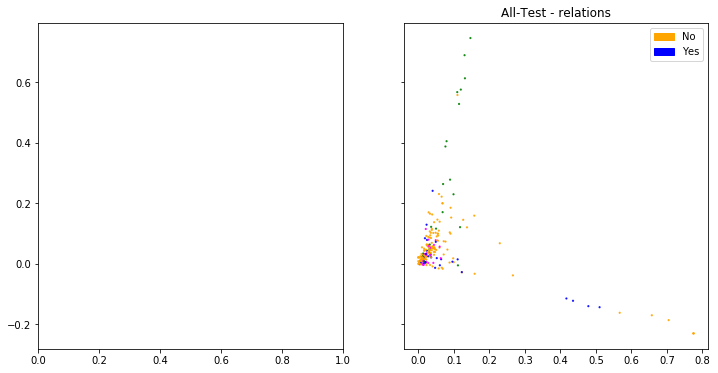

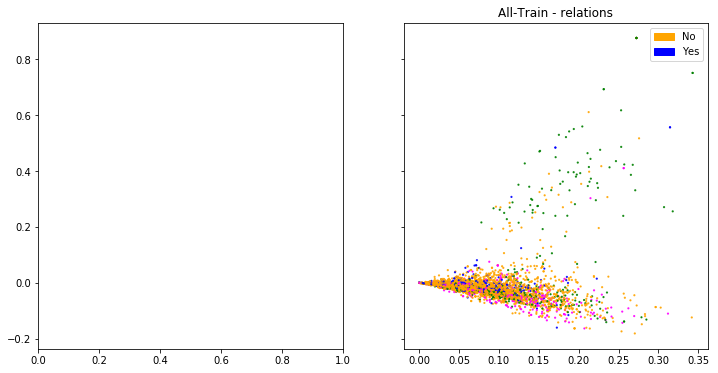

In [120]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for cat in dataframes.keys():

    df = dataframes[cat]
    labels = df['ActionName'].tolist()
    le.fit(labels)
    labels = le.transform(labels)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
    
#     X_counts = vectorizer.fit_transform(df['text-neigh-tokens'])
#     plot_LSA(X_counts, labels, ax1)
#     ax1.set_title("{} - neighbours".format(cat))
    
    X_counts = vectorizer.fit_transform(df['text-rel-tokens'])
    plot_LSA(X_counts, labels, ax2)
    ax2.set_title("{} - relations".format(cat))

In [33]:
'''
Now for the n-grams! 
Are there bigrams more interesting for the classifier than unigrams?
'''

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    ngram_range=(1, 3)
)

'''
Let's search for bigrams, which position are they,
if we also take unigrams into consideration?

(COUNT VECTORIZER)
'''

for cat in dataframes.keys():
    print("\n>>> {}".format(cat))
    df = dataframes[cat]
    
    feature_count = 10 if 'Test' in cat else 100
    # because we expect nothing special from test dataset
    
    print("\nModel z relacjami:")
    X_counts = vectorizer.fit_transform(df['text-rel-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("bag-of-words: {x}".format(x=X_counts.shape[1]))
    result = get_top_occuring_words(X_counts, feature_count, vectorizer, df)
    for entry in result:
        category = entry[0]
        print("-", category)
        words = entry[1]
        for idx, word in enumerate(words):
            len_check = len(word[0].split())
            if len_check > 1:
                print("{}. : {}, {}".format(idx, word[0], word[1]))
            
    
    print("\nModel 'sąsiedzi':")
    X_counts = vectorizer.fit_transform(df['text-neigh-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("bag-of-words: {x}".format(x=X_counts.shape[1]))
    result = get_top_occuring_words(X_counts, feature_count, vectorizer, df)
    for entry in result:
        category = entry[0]
        print("-", category)
        words = entry[1]
        for idx, word in enumerate(words):
            len_check = len(word[0].split())
            if len_check > 1:
                print("{}. : {}, {}".format(idx, word[0], word[1]))


>>> Other-Train

Model z relacjami:
bag-of-words: 10238
- NoOther
45. : command control, 19.0
57. : execut file, 16.0
60. : c&c server, 16.0
73. : download file, 13.0
76. : ip address, 13.0
82. : control server, 12.0
98. : command control server, 10.0
- Other
26. : post request, 22.0
43. : registri key, 16.0
49. : get request, 14.0
53. : http post, 13.0
62. : system-path system-path, 11.0
70. : http post request, 10.0
74. : pipe server, 9.0
78. : name pipe, 9.0
80. : dll modul, 8.0
97. : network share, 7.0
98. : http get request, 7.0
99. : http get, 7.0

Model 'sąsiedzi':
bag-of-words: 9447
- NoOther
26. : download execut, 22.0
58. : execut file, 13.0
64. : upload download, 12.0
87. : disk execut, 9.0
97. : download file, 9.0
- Other
49. : post request, 11.0
55. : registri key, 10.0
61. : get request, 9.0
68. : driver hook, 8.0
71. : http post, 8.0
81. : dll modul, 7.0
96. : usermod dll, 6.0
97. : load dll, 6.0

>>> File-Test

Model z relacjami:
bag-of-words: 844
- File
4. : event log

KeyboardInterrupt: 

In [15]:
'''
Check scores considering n-grams for TDIDF Vectorizer!
'''

vectorizer = TfidfVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    ngram_range=(1,3)
)

for cat in dataframes.keys():
    print("\n>>> {}".format(cat))
    df = dataframes[cat]
    
    feature_count = 10 if 'Test' in cat else 100
    # because we expect nothing special from test dataset
    
    print("\nModel z relacjami:")
    X_counts = vectorizer.fit_transform(df['text-rel-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("bag-of-words: {x}".format(x=X_counts.shape[1]))
    result = get_top_occuring_words(X_counts, feature_count, vectorizer, df)
    for entry in result:
        category = entry[0]
        print("-", category)
        words = entry[1]
        for idx, word in enumerate(words):
            len_check = len(word[0].split())
            if len_check > 1:
                print("{}. : {}, {}".format(idx, word[0], word[1]))
            
    
    print("\nModel 'sąsiedzi':")
    X_counts = vectorizer.fit_transform(df['text-neigh-tokens']) # stwórz macierz liczbową z danych. W wierszach mamy kolejne dokumenty, w kolumnach kolejne pola wektora cech odpowiadające unikalnym słowom (bag of words)
    print("bag-of-words: {x}".format(x=X_counts.shape[1]))
    result = get_top_occuring_words(X_counts, feature_count, vectorizer, df)
    for entry in result:
        category = entry[0]
        print("-", category)
        words = entry[1]
        for idx, word in enumerate(words):
            len_check = len(word[0].split())
            if len_check > 1:
                print("{}. : {}, {}".format(idx, word[0], word[1]))


>>> ActionName-Train

Model z relacjami:
bag-of-words: 30775
- ActionName
47. : download file, 5.839672193343967
56. : execut file, 5.001764667127984
64. : post request, 4.601443536432968
69. : upload file, 4.3525977951713415
83. : command control, 3.727395518858263
92. : c&c server, 3.4038398288696743
- NoActionName
35. : c&c server, 9.282584717553169
41. : command control, 8.92652424556101
82. : attack use, 5.516364230587741
85. : ip address, 5.450388832132534

Model 'sąsiedzi':
bag-of-words: 25913
- ActionName
40. : download execut, 5.3181342086504815
88. : execut file, 3.164302576102987
92. : upload download, 3.049998721769038
- NoActionName
54. : c&c server, 6.728795838029409

>>> ActionName-Test

Model z relacjami:
bag-of-words: 2604
- ActionName
- NoActionName
4. : c&c server, 2.673775449766095

Model 'sąsiedzi':
bag-of-words: 2265
- ActionName
9. : download execut, 1.1457942846834346
- NoActionName
6. : c&c server, 1.9204115043608707

>>> Capability-Train

Model z relacjami:
b

In [57]:
'''
Saving processed data to file
'''

subfolder = 'Processed'
for ccat in dataframes.keys():
    sub_path = os.getcwd() + "/Dataframes/All/" + subfolder
    new_filename = '{}-P.csv'.format(ccat)
    if "label" in dataframes[ccat].columns:
        dataframes[ccat].drop(["label"], axis=1)
    dataframes[ccat]['ActionName_num'] = dataframes[ccat]['ActionName'].map({'-':0, 'File':1, 'Network':2, 'Other':3})
    dataframes[ccat]['Capability_num'] = dataframes[ccat]['Capability'].map({'-':0, 'command_and_control':1, 'infection_propagation':2, 'Other':3})
    dataframes[ccat].to_csv(sub_path + "/" + new_filename)


In [56]:
dataframes['All-Train'].drop(['label'], axis=1)

,Unnamed: 0,text-rel,token,ActionName,Capability,text-rel-processed,text-rel-tokens,ActionName_num,Capability_num
0,0,ScanBox performs keylogging of users when they...,performs,-,other,scanbox perform keylog user visit compromis we...,"[scanbox, perform, keylog, user, visit, compro...",0,NaN
1,1,an attacker perform reconnaissance and key log...,perform,-,other,attack perform reconnaiss key log visitor comp...,"[attack, perform, reconnaiss, key, log, visito...",0,NaN
2,2,tracking files and drives present on the victi...,tracking,-,other,track file drive present victim machin,"[track, file, drive, present, victim, machin]",0,NaN
3,3,it being a command and control destination for...,being,-,command_and_control,command control destin malwar,"[command, control, destin, malwar]",0,1.0
4,4,the e-mails contain links to websites hosting ...,contain,-,infection_propagation,e-mail contain link websit host scanbox,"[e-mail, contain, link, websit, host, scanbox]",0,2.0
5,5,Both backdoors were dropped from malicious doc...,were dropped,Network,other,backdoor drop malici document built util tran ...,"[backdoor, drop, malici, document, built, util...",2,NaN
6,6,backdoor HTTP communicates via to a hard-coded...,communicates,-,other,backdoor http commun via hard-cod command cont...,"[backdoor, http, commun, via, hard-cod, comman...",0,NaN
7,7,this change decrease detection,decrease,-,other,thi chang decreas detect,"[thi, chang, decreas, detect]",0,NaN
8,8,sent a spear phish email to a Taiwanese govern...,sent,Network,infection_propagation,sent spear phish email taiwanes govern ministri,"[sent, spear, phish, email, taiwanes, govern, ...",2,2.0
9,9,The exploit document dropped the HIGHTIDE back...,dropped,-,-,exploit document drop hightid backdoor,"[exploit, document, drop, hightid, backdoor]",0,0.0
